<a href="https://colab.research.google.com/github/ktanguy/Summative/blob/main/Summative_Intro_to_ml_Tanguy_Kwizera_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimization Techniques in Machine Learning

Objective: This assignment aims to explore implementation or Machine Learning Models with regularization, optimization and Error analysis  techniques used in machine learning to improve models' performance, convergence speed, and efficiency..

A Notebook detailing the following

* Project name
* Clear out puts from cells






**Instructions**

1. Acquire a dataset suitable for ML tasks as per your proposal.
2. Implement a simple machine learning model based on neural networks on the chosen dataset without any defined optimization techniques. (Check instructions)
3. Implement and compare the model's performance after applying 3 to 4 disntict combinations regularization and optimization techniques.
4. Discuss the results on the README file.
5. Make predictions using test data
7. Implement error analysis techniques and ensure there is: F1-Score, Recall, Precision, RUC a confusion matrix using plotting libraries (not verbose)

Submit notebook to github repo




# Case Study and Implementation




In [40]:
#Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, Input
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import joblib

# The Dataset
> ***Brief Description:***
State the Problem and A short Description of the data


In [14]:
#TO DO: Load Data (Seprate into: Train, Validation and test sets)
!rm -rf /content/rice-plant-diseases*
!rm -f rice-plant-diseases-dataset.zip

# Download the dataset (same format as PlantVillage download)
!kaggle datasets download -d jay7080dev/rice-plant-diseases-dataset --force

# Unzip with correct directory structure (like PlantVillage)
!unzip -q rice-plant-diseases-dataset.zip -d /content/rice-plant-diseases

# Verify the structure matches PlantVillage's
!ls /content/rice-plant-diseases

Dataset URL: https://www.kaggle.com/datasets/jay7080dev/rice-plant-diseases-dataset
License(s): apache-2.0
 61% 108M/176M [00:00<00:00, 1.13GB/s]
100% 176M/176M [00:00<00:00, 327MB/s] 
'rice leaf diseases dataset'


In [23]:
##  Load & Preprocess Dataset
data_dir = '/content/rice-plant-diseases/rice leaf diseases dataset'

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_ds = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_ds = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

print("Detected Classes:", train_ds.class_indices)

Found 3748 images belonging to 3 classes.
Found 936 images belonging to 3 classes.
Detected Classes: {'Bacterialblight': 0, 'Brownspot': 1, 'Leafsmut': 2}


#SECTION 1: Model Architecture:



```
TODO: Insert an image with the Model architecture here.Replace the image Below
```
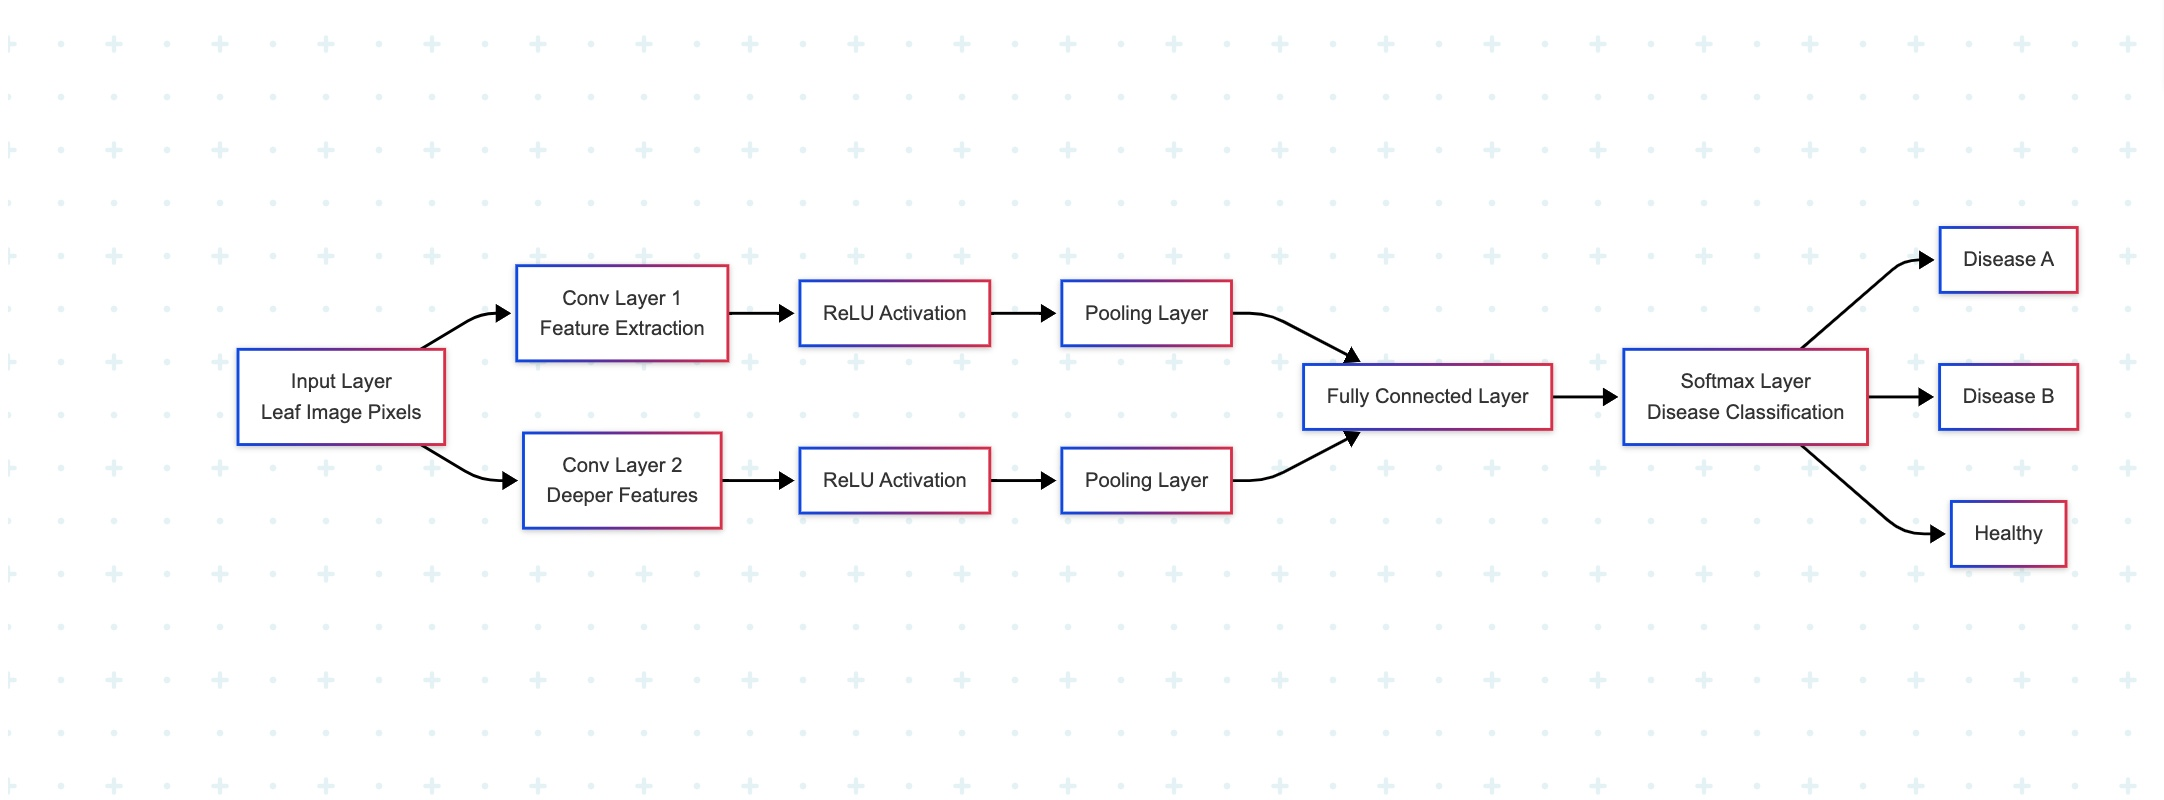



#Task: Define a function that creates models without and With specified Optimization techniques


In [25]:
## Define Modular Model Function
def define_model(optimizer_name='adam', regularization_type=None, early_stopping=False,
                 dropout=0.0, learning_rate=0.001, layers=3, train_data=None, val_data=None, epochs=10):

    model = Sequential()
    reg = None
    if regularization_type == 'l1':
        reg = l1(0.001)
    elif regularization_type == 'l2':
        reg = l2(0.001)
    elif regularization_type == 'l1_l2':
        reg = l1_l2(0.001)

    model.add(Input(shape=(224, 224, 3)))
    for _ in range(layers - 1):
        model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=reg))
        model.add(MaxPooling2D((2, 2)))
        if dropout > 0:
            model.add(Dropout(dropout))

    model.add(Flatten())
    model.add(Dense(64, activation='relu', kernel_regularizer=reg))
    model.add(Dense(train_data.num_classes, activation='softmax'))

    optimizer = Adam(learning_rate=learning_rate) if optimizer_name.lower() == 'adam' else RMSprop(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    callbacks = [EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)] if early_stopping else []

    history = model.fit(train_data, validation_data=val_data, epochs=epochs, callbacks=callbacks)
    return model, history

# Task: Print out the Final Model Accuracy and plot the Loss curve

In [18]:
import matplotlib.pyplot as plt

def loss_curve_plot(history):
    # Extract loss and val_loss
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)

    # Print final accuracy
    train_acc = history.history['accuracy'][-1]
    val_acc = history.history['val_accuracy'][-1]
    print(f"Final Training Accuracy: {train_acc:.4f}")
    print(f"Final Validation Accuracy: {val_acc:.4f}")

    # Plot
    plt.figure(figsize=(8, 5))
    plt.plot(epochs, loss, 'bo-', label='Training Loss')
    plt.plot(epochs, val_loss, 'r^-', label='Validation Loss')
    plt.title('Training and Validation Loss Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# SECTION 2: Optimization and Regularization Combinations
At this point you should now create models that combine various optimization techniques
As done before make sure to plot out the loss curve and the accuracy and loss in verbose

In [35]:
## Model 1 – Default (No Optimization)
model_1, history_1 = define_model(
    optimizer_name='adam',
    regularization_type=None,
    early_stopping=False,
    dropout=0.0,
    learning_rate=0.001,
    layers=3,
    train_data=train_ds,
    val_data=val_ds,
    epochs=10
)
model_1.save("saved_models/model_1_default.h5")

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


118/118 ━━━━━━━━━━━━━━━━━━━━ 241s 2s/step - accuracy: 0.5176 - loss: 1.5427 - val_accuracy: 0.8462 - val_loss: 0.4586
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 233s 2s/step - accuracy: 0.8757 - loss: 0.3664 - val_accuracy: 0.9284 - val_loss: 0.2035
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 232s 2s/step - accuracy: 0.9532 - loss: 0.1538 - val_accuracy: 0.9679 - val_loss: 0.1108
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 233s 2s/step - accuracy: 0.9795 - loss: 0.0676 - val_accuracy: 0.9882 - val_loss: 0.0462
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 238s 2s/step - accuracy: 0.9965 - loss: 0.0191 - val_accuracy: 0.9818 - val_loss: 0.0543
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 232s 2s/step - accuracy: 0.9973 - loss: 0.0146 - val_accuracy: 0.9957 - val_loss: 0.0143
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 233s 2s/step - accuracy: 1.0000 - loss: 0.0030 - val_accuracy: 0.9989 - val_loss: 0.0026
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 234s 2s/step - accuracy: 1.0000 - loss: 9.1963e-04 - val_accuracy: 0

In [36]:
##Model 2 – Adam + L2 + EarlyStopping
model_2, history_2 = define_model(
    optimizer_name='adam',
    regularization_type='l2',
    early_stopping=True,
    dropout=0.3,
    learning_rate=0.0005,
    layers=3,
    train_data=train_ds,
    val_data=val_ds,
    epochs=15
)
model_2.save("saved_models/model_2_adam_l2.h5")

Epoch 1/15
118/118 ━━━━━━━━━━━━━━━━━━━━ 277s 2s/step - accuracy: 0.3609 - loss: 2.6305 - val_accuracy: 0.4476 - val_loss: 1.2542
Epoch 2/15
118/118 ━━━━━━━━━━━━━━━━━━━━ 256s 2s/step - accuracy: 0.7205 - loss: 0.7984 - val_accuracy: 0.6453 - val_loss: 0.9320
Epoch 3/15
118/118 ━━━━━━━━━━━━━━━━━━━━ 257s 2s/step - accuracy: 0.7909 - loss: 0.6641 - val_accuracy: 0.8013 - val_loss: 0.7578
Epoch 4/15
118/118 ━━━━━━━━━━━━━━━━━━━━ 265s 2s/step - accuracy: 0.8200 - loss: 0.5939 - val_accuracy: 0.8066 - val_loss: 0.6947
Epoch 5/15
118/118 ━━━━━━━━━━━━━━━━━━━━ 257s 2s/step - accuracy: 0.8500 - loss: 0.5238 - val_accuracy: 0.8397 - val_loss: 0.6102
Epoch 6/15
118/118 ━━━━━━━━━━━━━━━━━━━━ 256s 2s/step - accuracy: 0.8911 - loss: 0.4273 - val_accuracy: 0.8162 - val_loss: 0.6404
Epoch 7/15
118/118 ━━━━━━━━━━━━━━━━━━━━ 257s 2s/step - accuracy: 0.9017 - loss: 0.3896 - val_accuracy: 0.9135 - val_loss: 0.3932
Epoch 8/15
118/118 ━━━━━━━━━━━━━━━━━━━━ 262s 2s/step - accuracy: 0.9462 - loss: 0.3002 - val_accu

In [37]:
##Model 3 – RMSprop (No Reg, No EarlyStopping)
model_3, history_3 = define_model(
    optimizer_name='rmsprop',
    regularization_type=None,
    early_stopping=False,
    dropout=0.2,
    learning_rate=0.001,
    layers=3,
    train_data=train_ds,
    val_data=val_ds,
    epochs=15
)
model_3.save("saved_models/model_3_rmsprop.h5")

Epoch 1/15
118/118 ━━━━━━━━━━━━━━━━━━━━ 250s 2s/step - accuracy: 0.5616 - loss: 1.9716 - val_accuracy: 0.5983 - val_loss: 0.8191
Epoch 2/15
118/118 ━━━━━━━━━━━━━━━━━━━━ 246s 2s/step - accuracy: 0.7521 - loss: 0.6024 - val_accuracy: 0.8483 - val_loss: 0.4521
Epoch 3/15
118/118 ━━━━━━━━━━━━━━━━━━━━ 263s 2s/step - accuracy: 0.8602 - loss: 0.3761 - val_accuracy: 0.9402 - val_loss: 0.2522
Epoch 4/15
118/118 ━━━━━━━━━━━━━━━━━━━━ 245s 2s/step - accuracy: 0.9218 - loss: 0.2170 - val_accuracy: 0.8718 - val_loss: 0.3227
Epoch 5/15
118/118 ━━━━━━━━━━━━━━━━━━━━ 244s 2s/step - accuracy: 0.9547 - loss: 0.1306 - val_accuracy: 0.9647 - val_loss: 0.1253
Epoch 6/15
118/118 ━━━━━━━━━━━━━━━━━━━━ 266s 2s/step - accuracy: 0.9718 - loss: 0.0895 - val_accuracy: 0.9786 - val_loss: 0.0991
Epoch 7/15
118/118 ━━━━━━━━━━━━━━━━━━━━ 245s 2s/step - accuracy: 0.9830 - loss: 0.0529 - val_accuracy: 0.9840 - val_loss: 0.0683
Epoch 8/15
118/118 ━━━━━━━━━━━━━━━━━━━━ 247s 2s/step - accuracy: 0.9889 - loss: 0.0535 - val_accu

In [41]:
## Model 4 – Adam + L1+L2 + EarlyStopping
model_4, history_4 = define_model(
    optimizer_name='adam',
    regularization_type='l1_l2',
    early_stopping=True,
    dropout=0.4,
    learning_rate=0.0003,
    layers=4,
    train_data=train_ds,
    val_data=val_ds,
    epochs=20
)
model_4.save("saved_models/model_4_best.h5")

Epoch 1/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 271s 2s/step - accuracy: 0.3948 - loss: 8.9656 - val_accuracy: 0.6303 - val_loss: 2.6685
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 265s 2s/step - accuracy: 0.6501 - loss: 2.2899 - val_accuracy: 0.7297 - val_loss: 1.7570
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 266s 2s/step - accuracy: 0.6896 - loss: 1.6365 - val_accuracy: 0.7158 - val_loss: 1.5452
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 263s 2s/step - accuracy: 0.7282 - loss: 1.3892 - val_accuracy: 0.7660 - val_loss: 1.3717
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 320s 2s/step - accuracy: 0.7365 - loss: 1.2908 - val_accuracy: 0.7714 - val_loss: 1.2289
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 262s 2s/step - accuracy: 0.7632 - loss: 1.1445 - val_accuracy: 0.7393 - val_loss: 1.1925
Epoch 7/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 270s 2s/step - accuracy: 0.7767 - loss: 1.1223 - val_accuracy: 0.7703 - val_loss: 1.0960
Epoch 8/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 260s 2s/step - accuracy: 0.7972 - loss: 1.0115 - val_accu

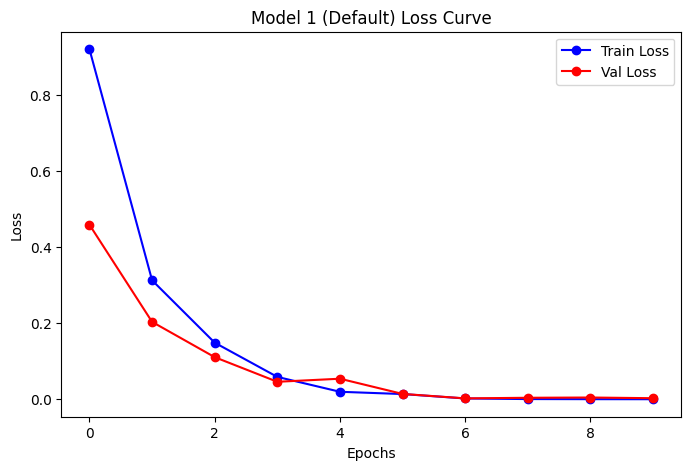

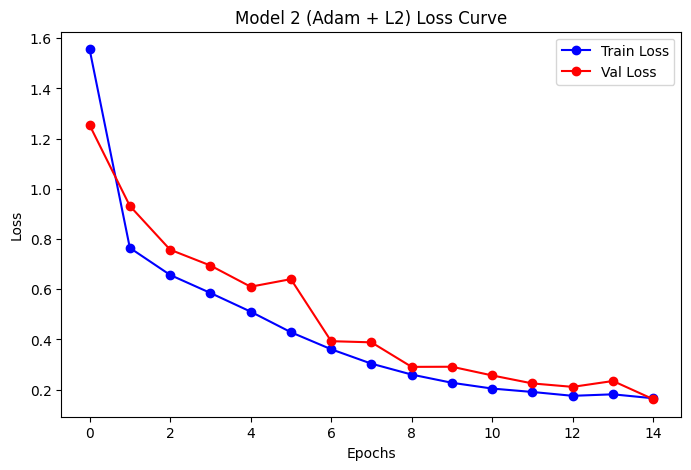

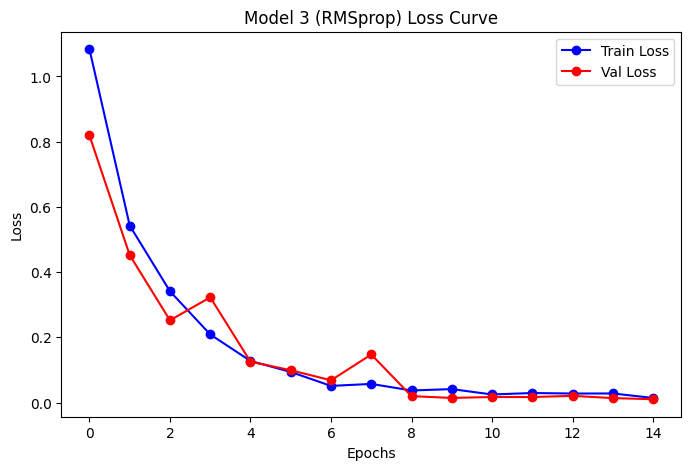

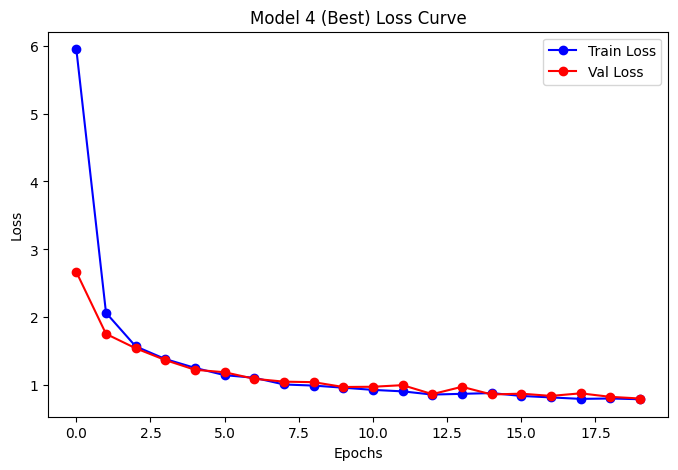

In [42]:
## Plot Loss Curve Function
def loss_curve_plot(history, title="Loss Curve"):
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['loss'], 'bo-', label='Train Loss')
    plt.plot(history.history['val_loss'], 'ro-', label='Val Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

loss_curve_plot(history_1, "Model 1 (Default) Loss Curve")
loss_curve_plot(history_2, "Model 2 (Adam + L2) Loss Curve")
loss_curve_plot(history_3, "Model 3 (RMSprop) Loss Curve")
loss_curve_plot(history_4, "Model 4 (Best) Loss Curve")

In [43]:
## Classical ML Model – Logistic Regression
X_train, y_train = next(train_ds)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
y_train_labels = y_train.argmax(axis=1)

clf = LogisticRegression(max_iter=500)
clf.fit(X_train_flat, y_train_labels)
joblib.dump(clf, "saved_models/model_classical_lr.pkl")

['saved_models/model_classical_lr.pkl']

30/30 ━━━━━━━━━━━━━━━━━━━━ 25s 815ms/step
📋 Model 1 (Default) Classification Report:
                 precision    recall  f1-score   support

Bacterialblight       0.32      0.32      0.32       320
      Brownspot       0.34      0.34      0.34       324
       Leafsmut       0.30      0.30      0.30       292

       accuracy                           0.32       936
      macro avg       0.32      0.32      0.32       936
   weighted avg       0.32      0.32      0.32       936



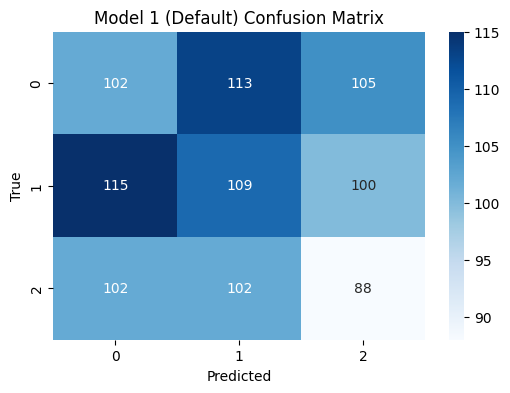

30/30 ━━━━━━━━━━━━━━━━━━━━ 16s 530ms/step
📋 Model 2 (Adam + L2) Classification Report:
                 precision    recall  f1-score   support

Bacterialblight       0.37      0.37      0.37       320
      Brownspot       0.32      0.32      0.32       324
       Leafsmut       0.33      0.32      0.32       292

       accuracy                           0.34       936
      macro avg       0.34      0.34      0.34       936
   weighted avg       0.34      0.34      0.34       936



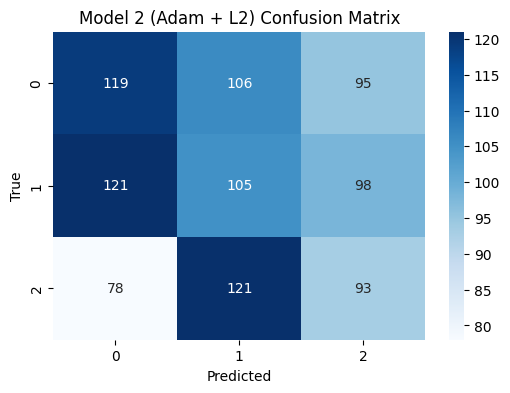

30/30 ━━━━━━━━━━━━━━━━━━━━ 17s 569ms/step
📋 Model 3 (RMSprop) Classification Report:
                 precision    recall  f1-score   support

Bacterialblight       0.36      0.36      0.36       320
      Brownspot       0.31      0.31      0.31       324
       Leafsmut       0.25      0.25      0.25       292

       accuracy                           0.31       936
      macro avg       0.31      0.31      0.31       936
   weighted avg       0.31      0.31      0.31       936



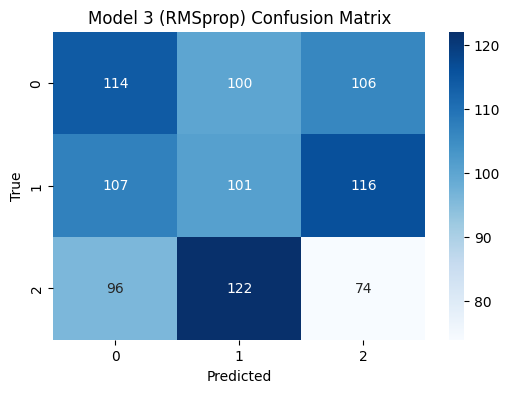

30/30 ━━━━━━━━━━━━━━━━━━━━ 17s 550ms/step
📋 Model 4 (Best) Classification Report:
                 precision    recall  f1-score   support

Bacterialblight       0.33      0.33      0.33       320
      Brownspot       0.35      0.31      0.33       324
       Leafsmut       0.30      0.35      0.32       292

       accuracy                           0.33       936
      macro avg       0.33      0.33      0.33       936
   weighted avg       0.33      0.33      0.33       936



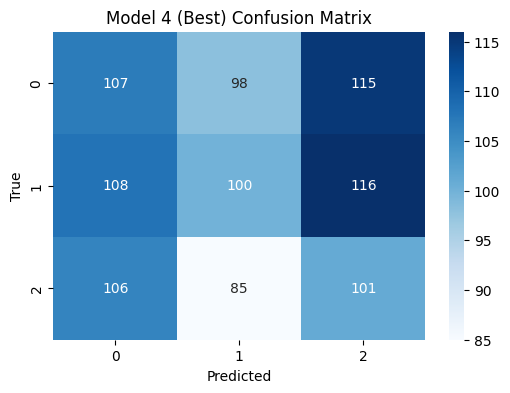

In [44]:
## 10. 📈 Evaluation Function
def evaluate_model(model, val_data, title="Model"):
    val_data.reset()
    Y_pred = model.predict(val_data)
    y_pred = np.argmax(Y_pred, axis=1)
    y_true = val_data.classes

    print(f"📋 {title} Classification Report:")
    print(classification_report(y_true, y_pred, target_names=list(val_data.class_indices.keys())))
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{title} Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

evaluate_model(model_1, val_ds, "Model 1 (Default)")
evaluate_model(model_2, val_ds, "Model 2 (Adam + L2)")
evaluate_model(model_3, val_ds, "Model 3 (RMSprop)")
evaluate_model(model_4, val_ds, "Model 4 (Best)")

#Task: Make Predictions using the best saved model


Create a confusion Matrix and F1 score for both Models. Ensure outputs for the cells are visible

Finally, Make predictions using the best model. By the time you get to this cell you may realise at some point you needed to save the model so that you cal load it later

In [48]:
from tensorflow.keras.models import load_model
import numpy as np

def make_predictions(model_path, data_generator):
    # Load the trained model
    model = load_model(model_path)

    # Predict probabilities
    preds = model.predict(data_generator)

    # Convert probabilities to class indices
    predicted_classes = np.argmax(preds, axis=1)

    return predicted_classes


30/30 ━━━━━━━━━━━━━━━━━━━━ 28s 906ms/step


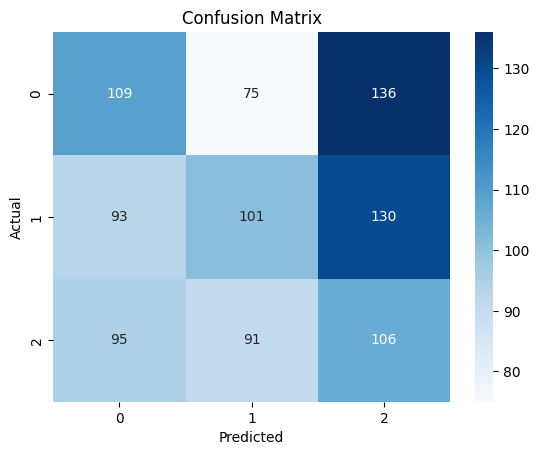


Classification Report:
                 precision    recall  f1-score   support

Bacterialblight       0.37      0.34      0.35       320
      Brownspot       0.38      0.31      0.34       324
       Leafsmut       0.28      0.36      0.32       292

       accuracy                           0.34       936
      macro avg       0.34      0.34      0.34       936
   weighted avg       0.35      0.34      0.34       936



In [47]:
# Get true labels from val_data
true_labels = val_data.classes

# Predict using best model
y_pred = make_predictions('saved_models/model_4_best.h5', val_data)

# Evaluate
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(true_labels, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(true_labels, y_pred, target_names=val_data.class_indices.keys()))


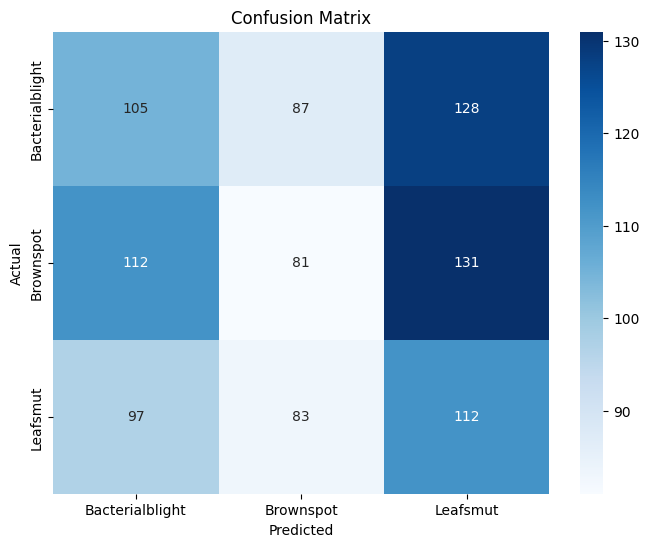


Classification Report:
                 precision    recall  f1-score   support

Bacterialblight       0.33      0.33      0.33       320
      Brownspot       0.32      0.25      0.28       324
       Leafsmut       0.30      0.38      0.34       292

       accuracy                           0.32       936
      macro avg       0.32      0.32      0.32       936
   weighted avg       0.32      0.32      0.32       936



In [50]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Get actual labels
true_labels = val_data.classes
class_names = list(val_data.class_indices.keys())

# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels, target_names=class_names))


In [49]:
model_path = "saved_models/model_4_best.h5"
predicted_labels = make_predictions(model_path, val_data)


30/30 ━━━━━━━━━━━━━━━━━━━━ 28s 907ms/step


Congratulations!!
